In [1]:
import os
import subprocess
# os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

# VDX_dir = '/home/alexi/Documents/ValDX'

VDX_dir = "/home/alexi/Documents/ValDX/"

import sys
sys.path.append(VDX_dir)

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

/home/alexi/Documents/interpretable-hdxer/notebooks/Figure_5_Poisoned_Ensemble


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
results_dir ="/home/alexi/Documents/interpretable-hdxer/data/fig5/sweep_poison"

# results_dir = '/home/alexi/Documents/ValDX/results/Sweep-Methods/'

# results_dir = "/home/alexi/Documents/ValDX/results/Find-Clusters2"
csvs = glob.glob(results_dir + '/**/*.csv', recursive=True)
csvs = [csv for csv in csvs if 'BPTI' in csv]

print(len(csvs))


42


In [3]:
pkls = glob.glob(results_dir + '/**/*.pkl', recursive=True)
pkls = [pkl for pkl in pkls if 'BPTI' in pkl]

print(len(pkls))

print(len(pkls))

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

import pickle

# load all the pkls
pkl_list = []
for pkl in pkls:
    with open(pkl, 'rb') as f:
        pkl_list.append(pickle.load(f))


# merge all the pkls
pkl_list = merge_AnalysisData_classes(pkl_list)



42
42
Merging AnalysisData classes
['train_dfs', 'val_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'HDX_data', 'weights', 'features', 'BV_constants', 'LogPfs', 'analysis_df']


In [4]:
def extract_protein_name(pkl_list:dict, protein_names: list):
    """
    Extracts the protein name from the name in the dictionary of pandas dataframes
    """

    for key, df in pkl_list.items():
        # iterate through the rows
        for i, row in df.iterrows():
            # print(row["name"])
            # iterate through the protein names
            for protein_name in protein_names:
                # check if the protein name is in the row name
                if protein_name in row["name"]:
                    print(i, protein_name)
                    # if it is, set the protein name to the protein name
                    row["protein"] = protein_name
            df.loc[i] = row
        
        pkl_list[key] = df

                    
    return pkl_list

protein_names = ["BPTI", "HOIP", "BRD4", "LXRa", "MBP"]

pkl_list = extract_protein_name(pkl_list, protein_names)
        
pkl_list["analysis_df"]



0 BPTI
1 BPTI
2 BPTI
3 BPTI
4 BPTI
5 BPTI
6 BPTI
7 BPTI
8 BPTI
9 BPTI
10 BPTI
11 BPTI
12 BPTI
13 BPTI
14 BPTI
15 BPTI
16 BPTI
17 BPTI
18 BPTI
19 BPTI
20 BPTI
21 BPTI
22 BPTI
23 BPTI
24 BPTI
25 BPTI
26 BPTI
27 BPTI
28 BPTI
29 BPTI
30 BPTI
31 BPTI
32 BPTI
33 BPTI
34 BPTI
35 BPTI
36 BPTI
37 BPTI
38 BPTI
39 BPTI
40 BPTI
41 BPTI
42 BPTI
43 BPTI
44 BPTI
45 BPTI
46 BPTI
47 BPTI
48 BPTI
49 BPTI
50 BPTI
51 BPTI
52 BPTI
53 BPTI
54 BPTI
55 BPTI
56 BPTI
57 BPTI
58 BPTI
59 BPTI
60 BPTI
61 BPTI
62 BPTI
63 BPTI
64 BPTI
65 BPTI
66 BPTI
67 BPTI
68 BPTI
69 BPTI
70 BPTI
71 BPTI
72 BPTI
73 BPTI
74 BPTI
75 BPTI
76 BPTI
77 BPTI
78 BPTI
79 BPTI
80 BPTI
81 BPTI
82 BPTI
83 BPTI
84 BPTI
85 BPTI
86 BPTI
87 BPTI
88 BPTI
89 BPTI
90 BPTI
91 BPTI
92 BPTI
93 BPTI
94 BPTI
95 BPTI
96 BPTI
97 BPTI
98 BPTI
99 BPTI
100 BPTI
101 BPTI
102 BPTI
103 BPTI
104 BPTI
105 BPTI
106 BPTI
107 BPTI
108 BPTI
109 BPTI
110 BPTI
111 BPTI
112 BPTI
113 BPTI
114 BPTI
115 BPTI
116 BPTI
117 BPTI
118 BPTI
119 BPTI
120 BPTI
121 BPTI
122 BPTI
123

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.167,Train,0.759235,train_BPTI_AF2-MSAss_noise_p20_1,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3
1,0.167,Val,0.329895,val_BPTI_AF2-MSAss_noise_p20_1,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3
2,0.167,Train,0.880798,train_BPTI_AF2-MSAss_noise_p20_2,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3
3,0.167,Val,0.399135,val_BPTI_AF2-MSAss_noise_p20_2,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3
4,0.167,Train,0.747135,train_BPTI_AF2-MSAss_noise_p20_3,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,10.000,Train,NaN,train_BPTI_AF2-MSAss_noise_p10_2,0.031231,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequenc...,train,train_R3
1634,10.000,Train,NaN,train_BPTI_AF2-MSAss_noise_p10_3,0.020420,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequenc...,train,train_R3
1635,10.000,Val,NaN,val_BPTI_AF2-MSAss_noise_p10_1,0.135821,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequenc...,val,val_R3
1636,10.000,Val,NaN,val_BPTI_AF2-MSAss_noise_p10_2,0.068514,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p10_RW_bench_R3_k_sequenc...,val,val_R3


In [5]:
def transform_naming(df):
    """
    Transform complex naming patterns in DataFrame to standardized ensemble categories.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing 'name' column with patterns like
                      'MBP_10Start_RW_bench_R3_k_sequence'
    
    Returns:
    pd.DataFrame: DataFrame with transformed naming columns
    """
    df = df.copy()
    
    # Extract method and fit from name
    df["protein"] = df["name"].apply(lambda x: x.split("_")[0])
    # df["method"] = df["name"].apply(lambda x: x.split("_")[6])

    df["level"] = df["name"].apply(lambda x: x.split("_")[3])
    

    # Initialize ensemble based on the core system type from name
    def determine_ensemble(name):
        parts = name.split("_")
        
        # Check for start conditions
        if "10Start" in name:
            return "10Start"
        if "1Start" in name:
            return "1Start"
            
        # Check for shaw_400
        if "shaw_400" in name:
            return "Shaw_400"
            
        # Check for TFES
        if "TFES" in name:
            return "TFES"
            
        # Check for clean/dirty
        if "clean" in name:
            return "af_clean"
        if "dirty" in name:
            return "af_dirty"
            
        # Default to method if no special case
        return parts[2]
    
    def determine_poison(name):
        parts = name.split("_")
        
        if "noise" in parts:
            return "add-noise"
        if "mix"in parts:
            return "mix-coords"
        if "shuffle" in parts:
            return "shuffle-protons"
        


    df["ensemble"] = df["name"].apply(determine_ensemble)

    df["poison_type"] = df["name"].apply(determine_poison)

    df["c_frac1"] = df["name"].apply(lambda x: x.split("_")[4])
    df["split_type"] = df ["name"].apply(lambda x: x.split("_")[-3])
    df["replicate"] = df["calc_name"].apply(lambda x: x.split("_")[-1])  

    # df["analysis"] = df["name"].apply(lambda x: x.split("_")[3])

    return df

In [6]:
pkl_list["analysis_df"].columns


Index(['time', 'Type', 'R', 'calc_name', 'mse', 'name', 'system', 'analysis',
       'split_type', 'protein', 'name_name', 'dataset', 'class'],
      dtype='object')

In [7]:

data_frames = []

for csv in csvs:
    data_frames.append(pd.read_csv(csv))

df = pd.concat(data_frames)
df.head()

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.167,Train,0.759235,train_BPTI_AF2-MSAss_noise_p20_1,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,p20,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3
1,0.167,Val,0.329895,val_BPTI_AF2-MSAss_noise_p20_1,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,p20,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3
2,0.167,Train,0.880798,train_BPTI_AF2-MSAss_noise_p20_2,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,p20,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3
3,0.167,Val,0.399135,val_BPTI_AF2-MSAss_noise_p20_2,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,p20,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3
4,0.167,Train,0.747135,train_BPTI_AF2-MSAss_noise_p20_3,NaN,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,p20,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,train,train_R3


In [8]:
#
df["method"] = df["name"].apply(lambda x: x.split("_")[4])

print(df["method"].unique())    

['RW']


In [9]:
df["c_frac1"] = df["name"].apply(lambda x: x.split("_")[4])

print(df["c_frac1"].unique())

['RW']


In [49]:
# protein_names = ["BPTI", "HOIP", "BRD4", "LXR", "MBP"]

df['protein'] = df['name'].apply(lambda x: x.split('_')[0])
# only include df that has non nan mse values
mse_df = df.dropna(subset=["mse"])
val_df = mse_df[mse_df["Type"] == "Val"]
val_df = transform_naming(val_df)
# remove val mse = 0
val_df = val_df[val_df["mse"] != 0]


print(val_df.method.value_counts())

method
RW    378
Name: count, dtype: int64


In [50]:
merge_df = pkl_list["merge_df"]

merge_df = transform_naming(merge_df)

merge_df.level.value_counts()

level
p20     1458
p500    1458
p0      1458
p1      1458
p10     1458
p50     1458
p100    1458
Name: count, dtype: int64

In [51]:
merge_df = pkl_list["merge_df"]
merge_df = transform_naming(merge_df)
def calc_MSE_difference(merge_df:pd.DataFrame, key='mse', prior_dataset='prior', val_dataset='val', exp_dataset="Experimental"):

    # extract only the values that contain the prior dataset
    prior_df = merge_df[merge_df["dataset"]==prior_dataset]

    val_df = merge_df[merge_df["dataset"]==val_dataset]

    exp_df = merge_df[merge_df["dataset"]==exp_dataset]

    systems = prior_df["system"].unique()

    print(len(systems))
    # iterate through the systems

    # create a new dataframe to store the differences
    dMSE_df = pd.DataFrame()

    mean_dMSE_df = pd.DataFrame()

    columns = val_df.columns.tolist()
    print(columns)
    # find all columns that are numbers
    times = [col for col in columns if col != str(col)]

    string_columns = [col for col in columns if col not in times]

    columns_to_remove = ["peptide"]

    final_string_columns = [col for col in string_columns if col not in columns_to_remove]

    # print(times)
    # break


    for system in systems:


        system_prior_df = prior_df[prior_df["system"]==system]
        system_df = val_df[val_df["system"]==system]
        system_exp_df = exp_df[exp_df["system"]==system]
        # print(system_exp_df)

        # break
    # break
        # for each system remove the times that are NaN values to find the valid times for the system
        system_times = [time for time in times if not np.isnan(system_df[time].values).all()]
        print(system_times)

        system_replicates = system_df["replicate"].unique()
        print(system_replicates)
        # break

        for rep in system_replicates:

            system_calc_df = system_df[system_df["replicate"]==rep]
            system_prior_calc_df = system_prior_df[system_prior_df["replicate"]==rep]

            val_peptides = system_calc_df["peptide"].unique()

            system_prior_calc_df = system_prior_calc_df[system_prior_calc_df["peptide"].isin(val_peptides)]

            # system_exp_calc_df = system_exp_df[system_exp_df["replicate"]==rep]

            system_exp_calc_df = system_exp_df[system_exp_df["peptide"].isin(val_peptides)]

            # print(system_exp_calc_df)




            print("system_prior_calc_df")
            print(system_prior_calc_df.peptide.value_counts())
            print("system_calc_df")
            print(system_calc_df.peptide.value_counts())


            df_to_add = system_calc_df.copy()

            for time in system_times:
                print(time)
                print(system_calc_df[time].values)
                print(system_prior_calc_df[time].values)
                # break
                experimental_values = system_exp_calc_df[time].values
                df_to_add[time] = np.abs(system_calc_df[time].values-experimental_values)**2 - np.abs(system_prior_calc_df[time].values-experimental_values)**2

                print(df_to_add[time].values)
                # break


            dMSE_df = pd.concat([dMSE_df, df_to_add])


            # average the dMSE values for each peptide from df_to_add for each system_time
            mean_dMSE = df_to_add.groupby("calc_name")[system_times].mean().values

            mean_dMSE = pd.DataFrame(mean_dMSE, columns=system_times)

            # add the string columns to the mean_dMSE
            for col in string_columns:
                mean_dMSE[col] = df_to_add[col].values[0]

            print(mean_dMSE)

            # pivot mean_dMSE so that the system_time columns are under Time and the value is the dMSE
            mean_dMSE = pd.melt(mean_dMSE, id_vars=final_string_columns, value_vars=system_times, var_name="time", value_name="dMSE")

            print(mean_dMSE)


            mean_dMSE_df = pd.concat([mean_dMSE_df, mean_dMSE])



        #     break
        # break

    column_order = times + string_columns
    # dMSE_df = dMSE_df[column_order]
    # mean_dMSE_df = mean_dMSE_df[column_order]


    return dMSE_df, mean_dMSE_df

dMSE_df, mean_dMSE_df = calc_MSE_difference(merge_df, key='mse', prior_dataset='prior')

42
[0.167, 1.0, 10.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path', 'name', 'system', 'analysis', 'split_type', 'protein', 'name_name', 'dataset', 'class', 'level', 'ensemble', 'poison_type', 'c_frac1', 'replicate']
[0.167, 1.0, 10.0]
['1' '2' '3']
system_prior_calc_df
peptide
14    1
15    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
35    1
Name: count, dtype: int64
system_calc_df
peptide
14    1
15    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
35    1
Name: count, dtype: int64
0.167
[6.86206344e-01 1.79135539e-02 2.82357781e-03 3.50244931e-02
 2.27491870e-03 1.01979969e-01 2.84988072e-03 1.29876818e-01
 5.73650892e-04 1.57145396e-03 2.40695642e-02 3.69766125e-01
 2.13754056e-01 3.87453593e-03 2.24803057e-01 5.84883098e-04
 1.16329043e-03 4.99138420e-02 7.78510376e-02 3.22673519e-03]
[7.367751

In [52]:
MSE_df = transform_naming(dMSE_df)
mean_dMSE_df = transform_naming(mean_dMSE_df)

fit_mean_dMSE_df = mean_dMSE_df

mean_fit_mean_dMSE_df = fit_mean_dMSE_df.groupby(["name", "replicate", "protein", "split_type"])["dMSE"].mean().reset_index()
RW_mean_fit_mean_dMSE_df = mean_fit_mean_dMSE_df[["name", "replicate", "dMSE"]]



In [53]:
log_PF_df = pkl_list["LogPfs"]

def calc_pmf(logPfs: pd.DataFrame, R=8.31, T=300):
    """
    Calculates ensemble-average conformational and optimization thermodynamic quantities at each residue position.
    Returns a tuple of two dataframes: (result_df, ensemble_df)
    
    Calculates:
    - Optimization metrics (opt): Total changes during optimization
    - Conformational metrics (conf): Changes in conformational dynamics at fixed interaction strength
    """
    logPfs = logPfs.copy()
    logPfs["rep"] = logPfs["calc_name"].apply(lambda x: x.split("_")[-1])
    logPfs["system_name"] = logPfs["system"] + "_" + logPfs["rep"]
    logPfs = logPfs[logPfs["dataset"] != "val"]
    
    systems = logPfs.system_name.unique()
    dfs = []
    ensemble_data = []
    
    for system in systems:
        # Get data for this system
        system_df = logPfs[logPfs["system_name"] == system].copy()
        
        # Calculate initial metrics for all data points
        system_df["beta_star"] = system_df.groupby("calc_name")["LogPf"].transform("std")/(R*T)
        system_df["avg_logPF"] = system_df.groupby("calc_name")["LogPf"].transform("mean")
        system_df["log_delta_PFi"] = np.abs(system_df["LogPf"] - system_df["avg_logPF"])
        system_df["N_quanta"] = system_df["log_delta_PFi"] / system_df["beta_star"]
        
        # Get prior data after calculating initial metrics
        prior_df = system_df[system_df["dataset"] == "prior"].copy()


        # Calculate delta metrics using prior data
        system_df["delta_beta_star"] = system_df["beta_star"] - prior_df["beta_star"].iloc[0]
        system_df["delta_avg_logPF"] = np.abs(system_df["avg_logPF"] - prior_df["avg_logPF"].iloc[0])
        system_df["delta_N_quanta"] = system_df["N_quanta"] - prior_df["N_quanta"].iloc[0]
        
        # Calculate enthalpies
        system_df["H_opt"] = R * T * system_df["log_delta_PFi"].abs()
        system_df["H_conf"] = R * T * system_df["beta_star"] * np.abs(system_df["delta_N_quanta"])
        system_df["H_interaction"] = R * T * np.abs(system_df["delta_beta_star"]) * system_df["N_quanta"]
        
        # Calculate partition function and probabilities
        system_df["omega_opt"] = R*T*np.log(system_df.groupby("calc_name")["log_delta_PFi"].transform("sum"))
        # system_df["Z_opt"] = 1/np.exp(-system_df["omega_opt"] / (R * T))
        system_df["q"] = np.exp(-system_df["log_delta_PFi"].abs())
        system_df["Z_opt"] = system_df.groupby("calc_name")["q"].transform("sum")
        print(system_df["Z_opt"])


        system_df["Pi_opt"] = system_df["Z_opt"] * np.exp(-system_df["H_opt"].abs() / (R * T))
        system_df["Pi_conf"] = system_df["Z_opt"] * np.exp(-system_df["H_conf"] / (R * T))
        
        # Calculate entropy terms
        system_df["S_opt"] = -R * system_df["Pi_opt"] * np.log(system_df["Pi_opt"])
        system_df["S_conf"] = -R * system_df["Pi_conf"] * np.log(system_df["Pi_conf"])
        
        # Calculate TdS terms
        system_df["TdS_opt"] = T * system_df["S_opt"]
        system_df["TdS_conf"] = T * system_df["S_conf"]
        
        # Calculate Gibbs free energy terms
        system_df["G_opt"] = system_df["H_opt"] - T * system_df["S_opt"]
        system_df["G_conf"] = system_df["H_conf"] - T * system_df["S_conf"]
        system_df["G_quasi"] = (R*T * system_df.groupby("calc_name")["delta_avg_logPF"].transform("mean")) - T * system_df["S_opt"]
        
        # Convert to kJ/mol
        for metric in ["H_opt", "H_conf", "H_interaction", "S_opt", "S_conf", "G_opt", "G_conf"]:
            system_df[f"{metric}_kj"] = system_df[metric] / 1000
        
        system_df["TdS_opt_kj"] = system_df["TdS_opt"] / 1000
        system_df["TdS_conf_kj"] = system_df["TdS_conf"] / 1000
        
        dfs.append(system_df)
        
        # Calculate ensemble averages for test data
        test_df = system_df[system_df["dataset"] == "test"].copy()
        prior_df = system_df[system_df["dataset"] == "prior"].copy()

            
        # Create aligned prior and test dataframes based on shared indices
        common_cols = test_df.columns.intersection(prior_df.columns)
        test_data = test_df[common_cols]
        prior_data = prior_df[common_cols]
        
        # Ensure we have matching indices/positions for comparison
        test_data = test_data.reset_index(drop=True)
        prior_data = prior_data.reset_index(drop=True)
        
        if len(test_df) > 0:
            ensemble_metrics = {
                'dataset': 'test',
                'name': test_df['name'].iloc[0],
                'system': test_df['system'].iloc[0],
                'system_name': test_df['system_name'].iloc[0],
                'calc_name': test_df['calc_name'].iloc[0],
                
                # Optimization metrics
                'avg_H_opt': test_df['H_opt'].mean(),
                'avg_H_opt_kj': test_df['H_opt_kj'].mean(),
                'avg_S_opt': test_df['S_opt'].mean(),
                'avg_S_opt_k': test_df['S_opt_kj'].mean(),
                'avg_TdS_opt': test_df['TdS_opt'].mean(),
                'avg_TdS_opt_kj': test_df['TdS_opt_kj'].mean(),
                '-avg_TdS_opt_kj': -test_df['TdS_opt_kj'].mean(),
                'avg_G_opt': test_df['G_opt'].mean(),
                'avg_G_opt_kj': test_df['G_opt_kj'].mean(),
                'avg_G_quasi': test_df['G_quasi'].mean(),
                'avg_G_quasi_kj': test_df['G_quasi'].mean()/1000,
                
                # Conformational metrics
                'avg_H_conf': test_df['H_conf'].mean(),
                'avg_H_conf_kj': test_df['H_conf_kj'].mean(),
                'avg_S_conf': test_df['S_conf'].mean(),
                'avg_S_conf_k': test_df['S_conf_kj'].mean(),
                'avg_TdS_conf': test_df['TdS_conf'].mean(),
                'avg_TdS_conf_kj': test_df['TdS_conf_kj'].mean(),
                'avg_G_conf': test_df['G_conf'].mean(),
                'avg_G_conf_kj': test_df['G_conf_kj'].mean(),
                
                # Interaction metrics
                'avg_H_interaction': test_df['H_interaction'].mean(),
                'avg_H_interaction_kj': test_df['H_interaction_kj'].mean(),
                
                # Other metrics
                'avg_beta_star': test_df['beta_star'].mean(),
                'avg_delta_avg_logPF': test_df['delta_avg_logPF'].mean(),
                'delta_PFi': test_df['log_delta_PFi'].mean(),
                'delta_H_abs': R*T*test_df['delta_avg_logPF'].mean(),
                'delta_H_abs_kj': R*T*test_df['delta_avg_logPF'].mean()/1000,
            }
            
            # Calculate delta metrics using aligned data
            delta_metrics = {
                'delta_H_opt': (test_data['H_opt'] - prior_data['H_opt']).abs().mean(),
                'delta_H_opt_kj': (test_data['H_opt'] - prior_data['H_opt']).abs().mean() / 1000,
                'delta_S_opt': (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'delta_S_opt_kj': (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                'Tdelta_S_opt': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'Tdelta_S_opt_kj': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                '-Tdelta_S_opt_kj': T * (-test_data['S_opt'] - -prior_data['S_opt']).abs().mean() / 1000,
                'delta_G_opt': (test_data['G_opt'] - prior_data['G_opt']).abs().mean(),
                'delta_G_opt_kj': (test_data['G_opt'] - prior_data['G_opt']).abs().mean() / 1000,
                'delta_G_conf': (test_data['G_conf'] - prior_data['G_conf']).abs().mean(),
                'delta_G_conf_kj': (test_data['G_conf'] - prior_data['G_conf']).abs().mean() / 1000,
                'delta_G_quasi': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean(),
                'delta_G_quasi_kj': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean() / 1000,
                'K_abs': np.exp(test_data['log_delta_PFi'].abs().mean()),
                'Q_abs': np.exp(test_data['delta_beta_star'].abs().mean()),
                'Z_opt': test_data['Z_opt'].mean(),
            }
            
            # Update ensemble metrics with delta metrics
            ensemble_metrics.update(delta_metrics)
            
            # Calculate likelihoods
            ensemble_metrics['likelihood_opt'] = np.exp(-ensemble_metrics['delta_G_opt_kj'] / (R * T))
            ensemble_metrics['likelihood_conf'] = np.exp(-ensemble_metrics['delta_G_conf_kj'] / (R * T))
            ensemble_metrics['quasi_likelihood'] = np.exp(-ensemble_metrics['delta_G_quasi_kj'] / (R * T))
            
            ensemble_data.append(ensemble_metrics)
    
    if not dfs:
        raise ValueError("No valid data was processed")
        
    result_df = pd.concat(dfs, ignore_index=True)
    ensemble_df = pd.DataFrame(ensemble_data)
    
    return result_df, ensemble_df

        # Usage
pmf_df, ensemble_pmf_df = calc_pmf(log_PF_df)

pmf_df = transform_naming(pmf_df)
ensemble_pmf_df = transform_naming(ensemble_pmf_df)


dMSE_ensemble_pmf_df = pd.merge(RW_mean_fit_mean_dMSE_df, ensemble_pmf_df, on=["name", "replicate"], how="inner")

dMSE_ensemble_pmf_df.ensemble.unique()

0     6.908510
1     6.908510
2     6.908510
3     6.908510
4     6.908510
        ...   
87    7.080492
88    7.080492
89    7.080492
90    7.080492
91    7.080492
Name: Z_opt, Length: 72, dtype: float64
92     6.90851
93     6.90851
94     6.90851
95     6.90851
96     6.90851
        ...   
181    7.68151
182    7.68151
183    7.68151
184    7.68151
185    7.68151
Name: Z_opt, Length: 72, dtype: float64
186    6.908510
187    6.908510
188    6.908510
189    6.908510
190    6.908510
         ...   
275    7.027757
276    7.027757
277    7.027757
278    7.027757
279    7.027757
Name: Z_opt, Length: 72, dtype: float64
280    6.90851
281    6.90851
282    6.90851
283    6.90851
284    6.90851
        ...   
364    6.80689
365    6.80689
366    6.80689
367    6.80689
368    6.80689
Name: Z_opt, Length: 72, dtype: float64
369    6.908510
370    6.908510
371    6.908510
372    6.908510
373    6.908510
         ...   
453    6.475705
454    6.475705
455    6.475705
456    6.475705
457    6.

array(['mix', 'noise', 'shuffle'], dtype=object)

In [54]:
val_df["ensemble"] = val_df["system"].apply(lambda x: x.split("_")[1])
print(val_df["ensemble"].unique())

['AF2-MSAss']


In [55]:
val_df.head()


,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class,method,c_frac1,level,ensemble,poison_type,replicate
22,0.167,Val,NaN,val_BPTI_AF2-MSAss_noise_p20_1,0.114431,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3,RW,RW,p20,AF2-MSAss,add-noise,1
23,0.167,Val,NaN,val_BPTI_AF2-MSAss_noise_p20_2,0.109426,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3,RW,RW,p20,AF2-MSAss,add-noise,2
24,0.167,Val,NaN,val_BPTI_AF2-MSAss_noise_p20_3,0.104427,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3,RW,RW,p20,AF2-MSAss,add-noise,3
29,1.000,Val,NaN,val_BPTI_AF2-MSAss_noise_p20_1,0.120366,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3,RW,RW,p20,AF2-MSAss,add-noise,1
30,1.000,Val,NaN,val_BPTI_AF2-MSAss_noise_p20_2,0.084119,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequence,RW_bench,R3,BPTI,BPTI_AF2-MSAss_noise_p20_RW_bench_R3_k_sequenc...,val,val_R3,RW,RW,p20,AF2-MSAss,add-noise,2


In [56]:
val_df.split_type.unique()

array(['R3', 'Sp'], dtype=object)

In [57]:
method_order = ['0.01' '0.05' '1.0' '0.1' '0.001' '0.002']
method_order = ["0.001", "0.002", "0.01", "0.05", "0.1", "1.0"]

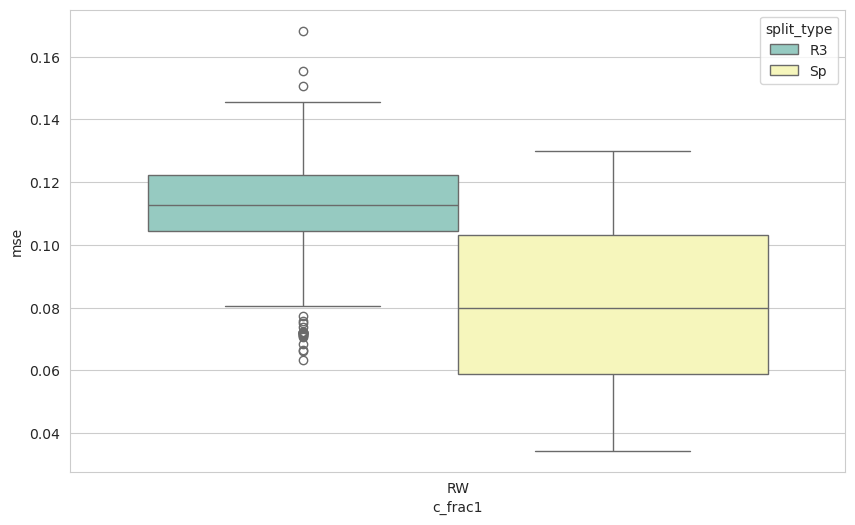

In [58]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

RW_val_df = val_df[val_df["analysis"] == "BV_bench"]

# RW_val_df = RW_val_df[RW_val_df["ensemble"] == "dirty"]


sns.boxplot(data=val_df, x="c_frac1", y="mse", hue="split_type", ax=ax, palette="Set3")#, order=method_order)

# ax.set_yscale("log")

plt.show()


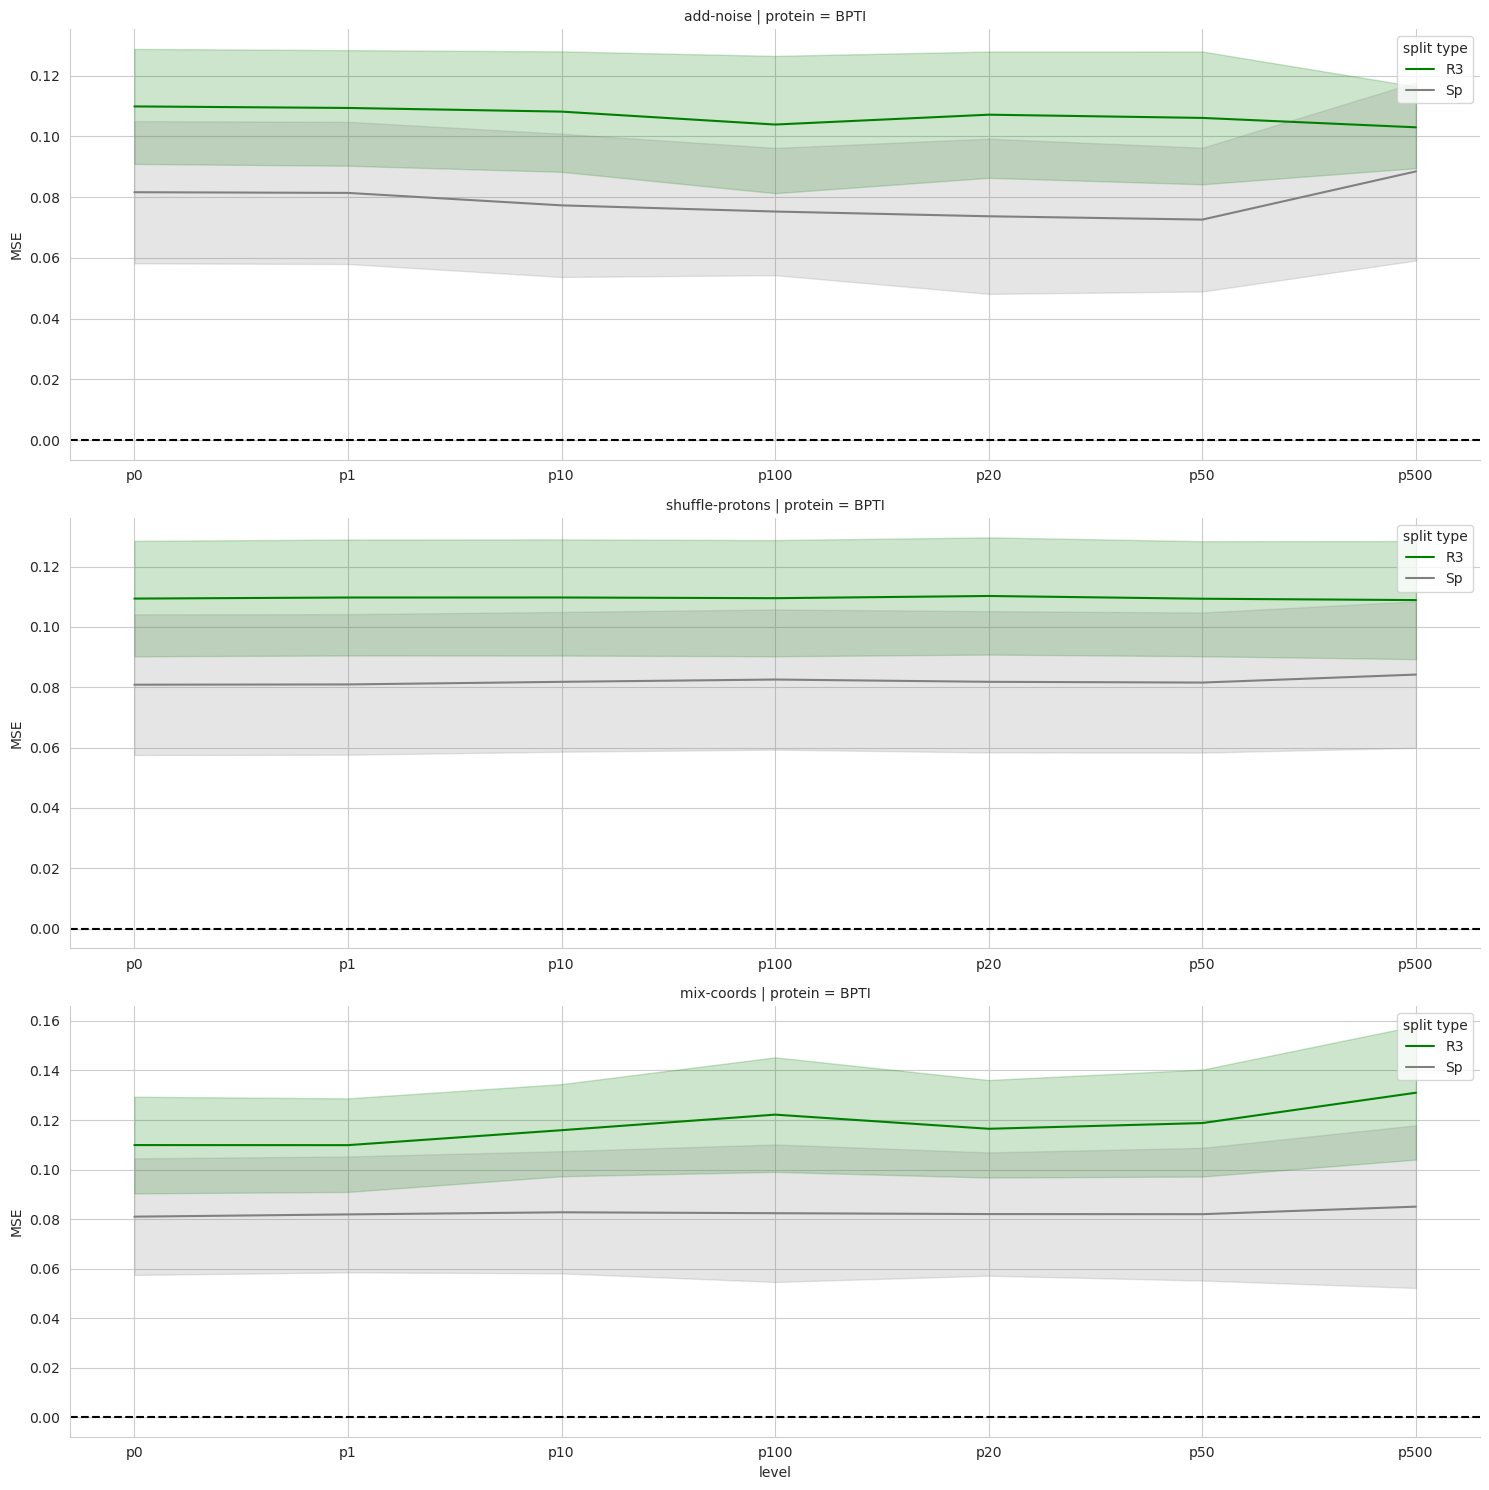

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)
def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # subtract "p0" from

        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(val_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])
g.map_dataframe(plot_mean_std, "level", "mse")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("MSE")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

In [20]:
dMSE_ensemble_pmf_df

,name,replicate,dMSE,dataset,system,system_name,calc_name,avg_H_opt,avg_H_opt_kj,avg_S_opt,...,Z_opt,likelihood_opt,likelihood_conf,quasi_likelihood,protein,level,ensemble,poison_type,c_frac1,split_type
0,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,1,-0.009019,test,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence_1,test_BPTI_AF2-MSAss_mix_p0_1,6714.046867,6.714047,-11.309305,...,6.941275,0.999519,0.999032,0.999326,BPTI,p0,mix,mix-coords,RW,R3
1,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,2,0.011713,test,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence_2,test_BPTI_AF2-MSAss_mix_p0_2,7192.658490,7.192658,-15.673314,...,7.444630,0.997672,0.997354,0.997378,BPTI,p0,mix,mix-coords,RW,R3
2,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,3,-0.007780,test,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_mix_p0_RW_bench_R3_k_sequence_3,test_BPTI_AF2-MSAss_mix_p0_3,6715.562477,6.715562,-11.074607,...,6.910400,0.999503,0.999003,0.999319,BPTI,p0,mix,mix-coords,RW,R3
3,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbours,1,-0.004789,test,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbours,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbou...,test_BPTI_AF2-MSAss_mix_p0_1,6906.201320,6.906201,-7.840170,...,6.457742,0.998754,0.997239,0.998679,BPTI,p0,mix,mix-coords,RW,Sp
4,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbours,2,0.021087,test,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbours,BPTI_AF2-MSAss_mix_p0_RW_bench_Sp_res_neighbou...,test_BPTI_AF2-MSAss_mix_p0_2,7316.360005,7.316360,-9.310217,...,6.433602,0.999038,0.998285,0.998678,BPTI,p0,mix,mix-coords,RW,Sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_sequence,2,0.012509,test,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_seque...,test_BPTI_AF2-MSAss_shuffle_p50_2,7197.907539,7.197908,-14.217190,...,7.268025,0.997791,0.997412,0.997519,BPTI,p50,shuffle,shuffle-protons,RW,R3
122,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_sequence,3,-0.007853,test,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_sequence,BPTI_AF2-MSAss_shuffle_p50_RW_bench_R3_k_seque...,test_BPTI_AF2-MSAss_shuffle_p50_3,6717.298924,6.717299,-10.876275,...,6.875217,0.999497,0.999125,0.999331,BPTI,p50,shuffle,shuffle-protons,RW,R3
123,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,1,-0.003641,test,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,test_BPTI_AF2-MSAss_shuffle_p50_1,6923.503962,6.923504,-7.037487,...,6.319632,0.998754,0.997376,0.998687,BPTI,p50,shuffle,shuffle-protons,RW,Sp
124,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,2,0.020836,test,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,BPTI_AF2-MSAss_shuffle_p50_RW_bench_Sp_res_nei...,test_BPTI_AF2-MSAss_shuffle_p50_2,7332.604148,7.332604,-8.884947,...,6.359121,0.999002,0.998445,0.998631,BPTI,p50,shuffle,shuffle-protons,RW,Sp


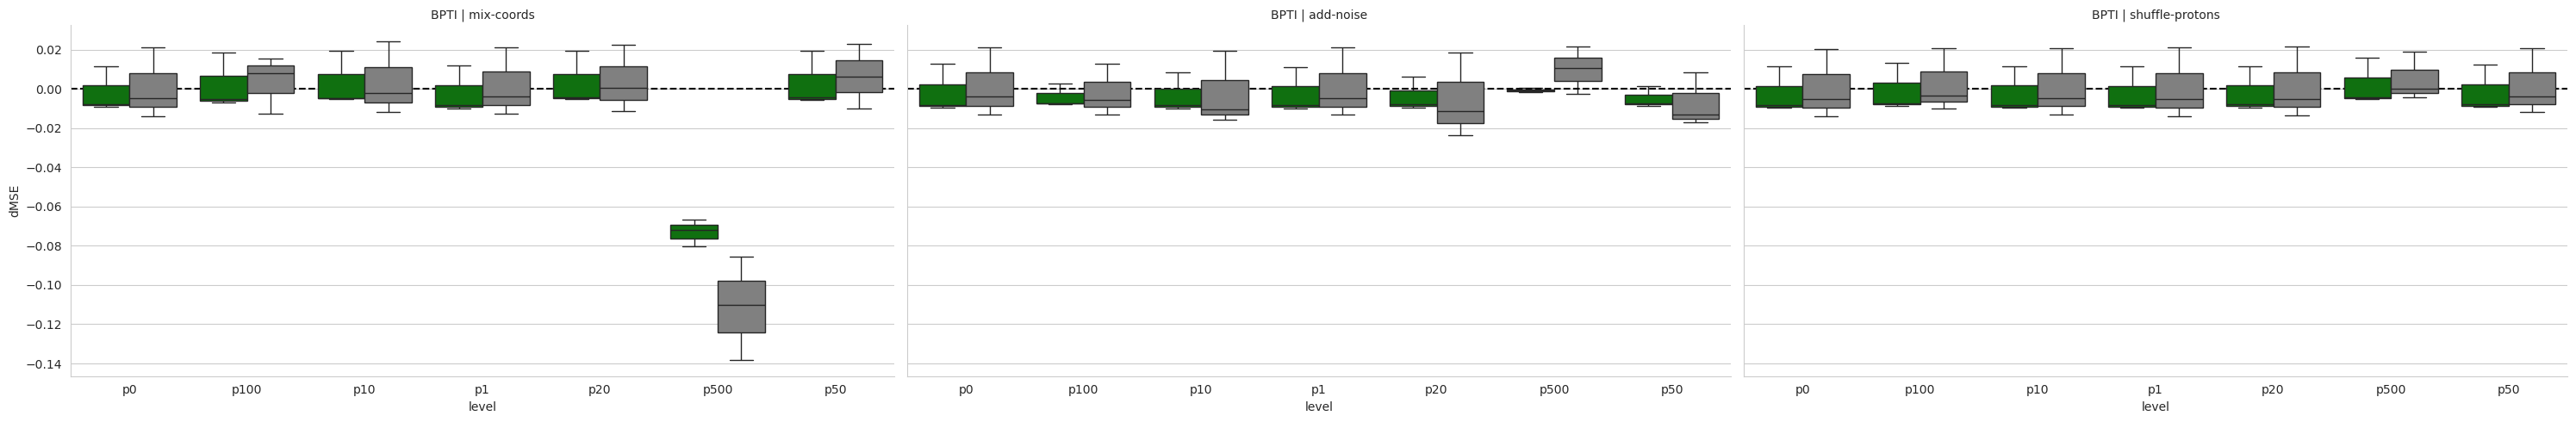

In [21]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="poison_type", height=5, aspect=2, sharey='row', sharex='row', row_order=["BPTI"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="level", y="dMSE", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("dMSE")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Set style
# sns.set_style("whitegrid")

# # Assuming dataset_order is defined as in your code
# dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# # Filter the dataframe
# dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]

# # Create FacetGrid
# g = sns.FacetGrid(dMSE_energy_df, row="protein", height=5, aspect=2, 
#                   sharey='row', sharex='row', row_order=["BPTI"])

# # Function to plot line with std deviation band
# def plot_line_with_std(data, x, y, hue, **kwargs):
#     # Calculate mean and std for each group
#     stats = data.groupby([x, hue])[y].agg(['mean', 'std']).reset_index()
    
#     # Plot lines
#     sns.lineplot(data=stats, x=x, y='mean', hue=hue, 
#                 palette={"R3": "green", "Sp": "grey"}, **kwargs)
    
#     # Add std deviation bands
#     for hue_val in data[hue].unique():
#         stats_hue = stats[stats[hue] == hue_val]
#         color = "green" if hue_val == "R3" else "grey"
#         plt.fill_between(stats_hue[x], 
#                         stats_hue['mean'] - stats_hue['std'],
#                         stats_hue['mean'] + stats_hue['std'],
#                         alpha=0.2, color=color)

# # Map the line plot to the FacetGrid
# g.map_dataframe(plot_line_with_std, x="c_frac1", y="dMSE", hue="split_type")

# # Customize the plot
# g.set_titles(row_template="{row_name}")
# g.set_ylabels("dMSE")

# # Add horizontal line at y=0
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# plt.show()

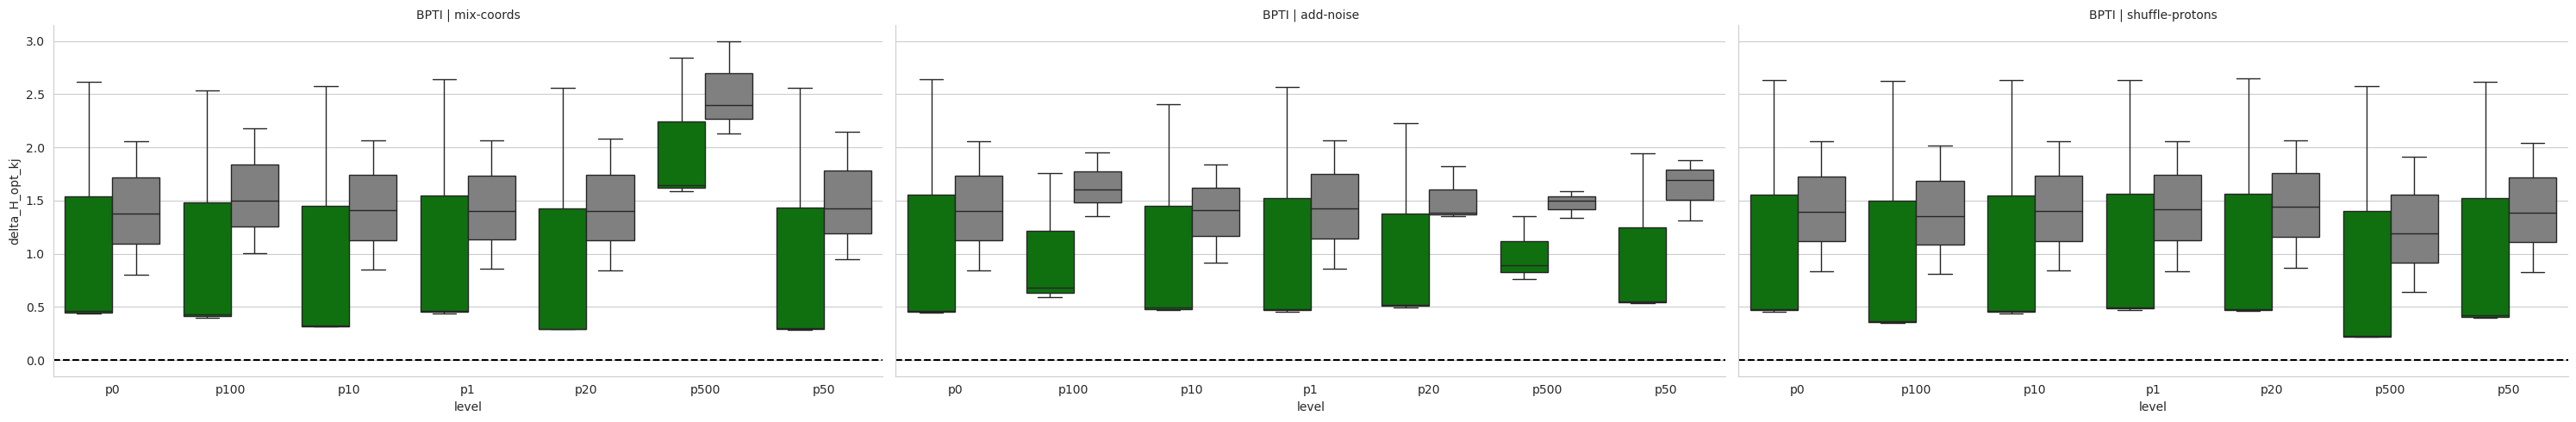

In [23]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="poison_type", height=5, aspect=2, sharey='row', sharex='row', row_order=["BPTI"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="level", y="delta_H_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("delta_H_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

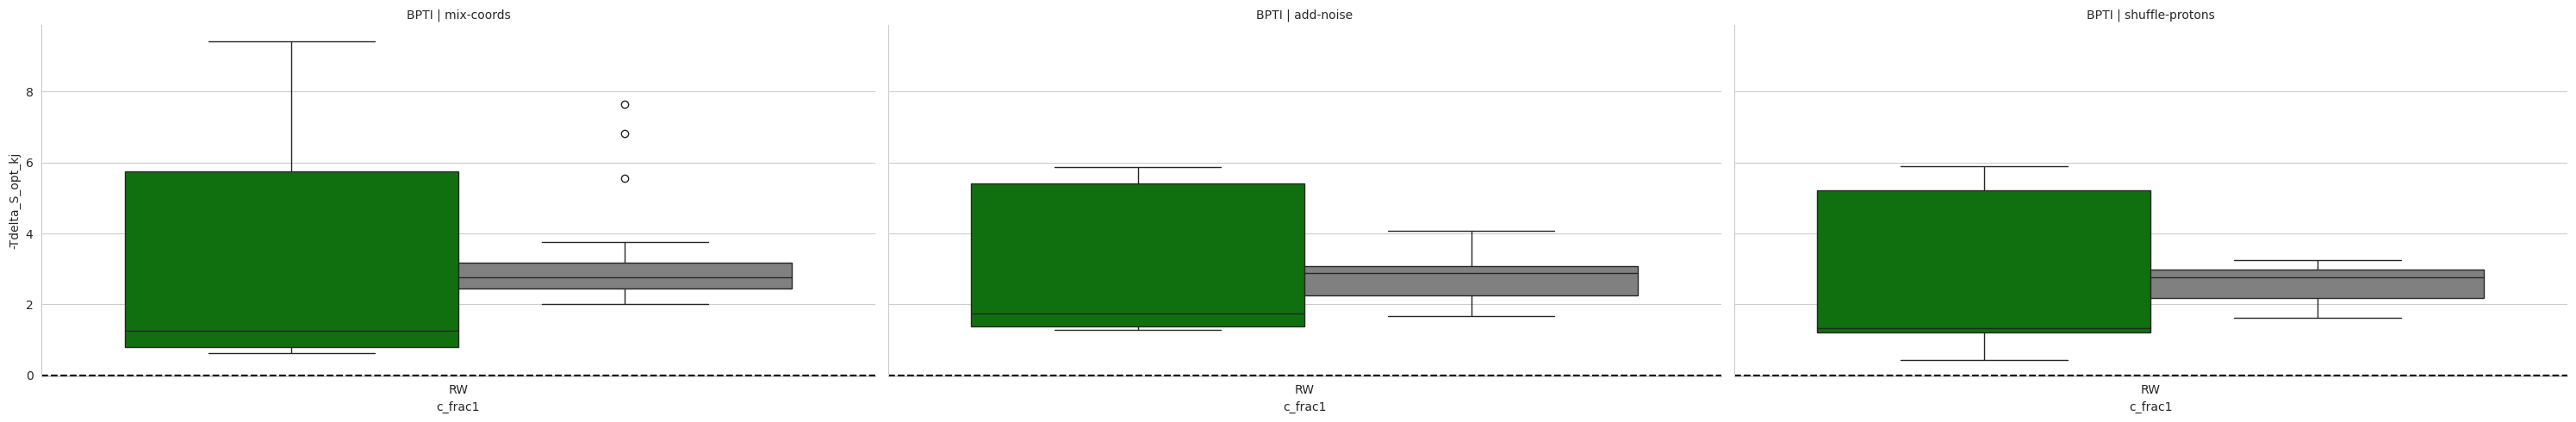

In [24]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="poison_type", height=5, aspect=2, sharey='row', sharex='row', row_order=["BPTI"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="-Tdelta_S_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("-Tdelta_S_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

In [47]:
dMSE_ensemble_pmf_df.columns

Index(['name', 'replicate', 'dMSE', 'dataset', 'system', 'system_name',
       'calc_name', 'avg_H_opt', 'avg_H_opt_kj', 'avg_S_opt', 'avg_S_opt_k',
       'avg_TdS_opt', 'avg_TdS_opt_kj', '-avg_TdS_opt_kj', 'avg_G_opt',
       'avg_G_opt_kj', 'avg_G_quasi', 'avg_G_quasi_kj', 'avg_H_conf',
       'avg_H_conf_kj', 'avg_S_conf', 'avg_S_conf_k', 'avg_TdS_conf',
       'avg_TdS_conf_kj', 'avg_G_conf', 'avg_G_conf_kj', 'avg_H_interaction',
       'avg_H_interaction_kj', 'avg_beta_star', 'avg_delta_avg_logPF',
       'delta_PFi', 'delta_H_abs', 'delta_H_abs_kj', 'delta_H_opt',
       'delta_H_opt_kj', 'delta_S_opt', 'delta_S_opt_kj', 'Tdelta_S_opt',
       'Tdelta_S_opt_kj', '-Tdelta_S_opt_kj', 'delta_G_opt', 'delta_G_opt_kj',
       'delta_G_conf', 'delta_G_conf_kj', 'delta_G_quasi', 'delta_G_quasi_kj',
       'K_abs', 'Q_abs', 'Z_opt', 'likelihood_opt', 'likelihood_conf',
       'quasi_likelihood', 'protein', 'level', 'ensemble', 'poison_type',
       'c_frac1', 'split_type'],
      dtype=

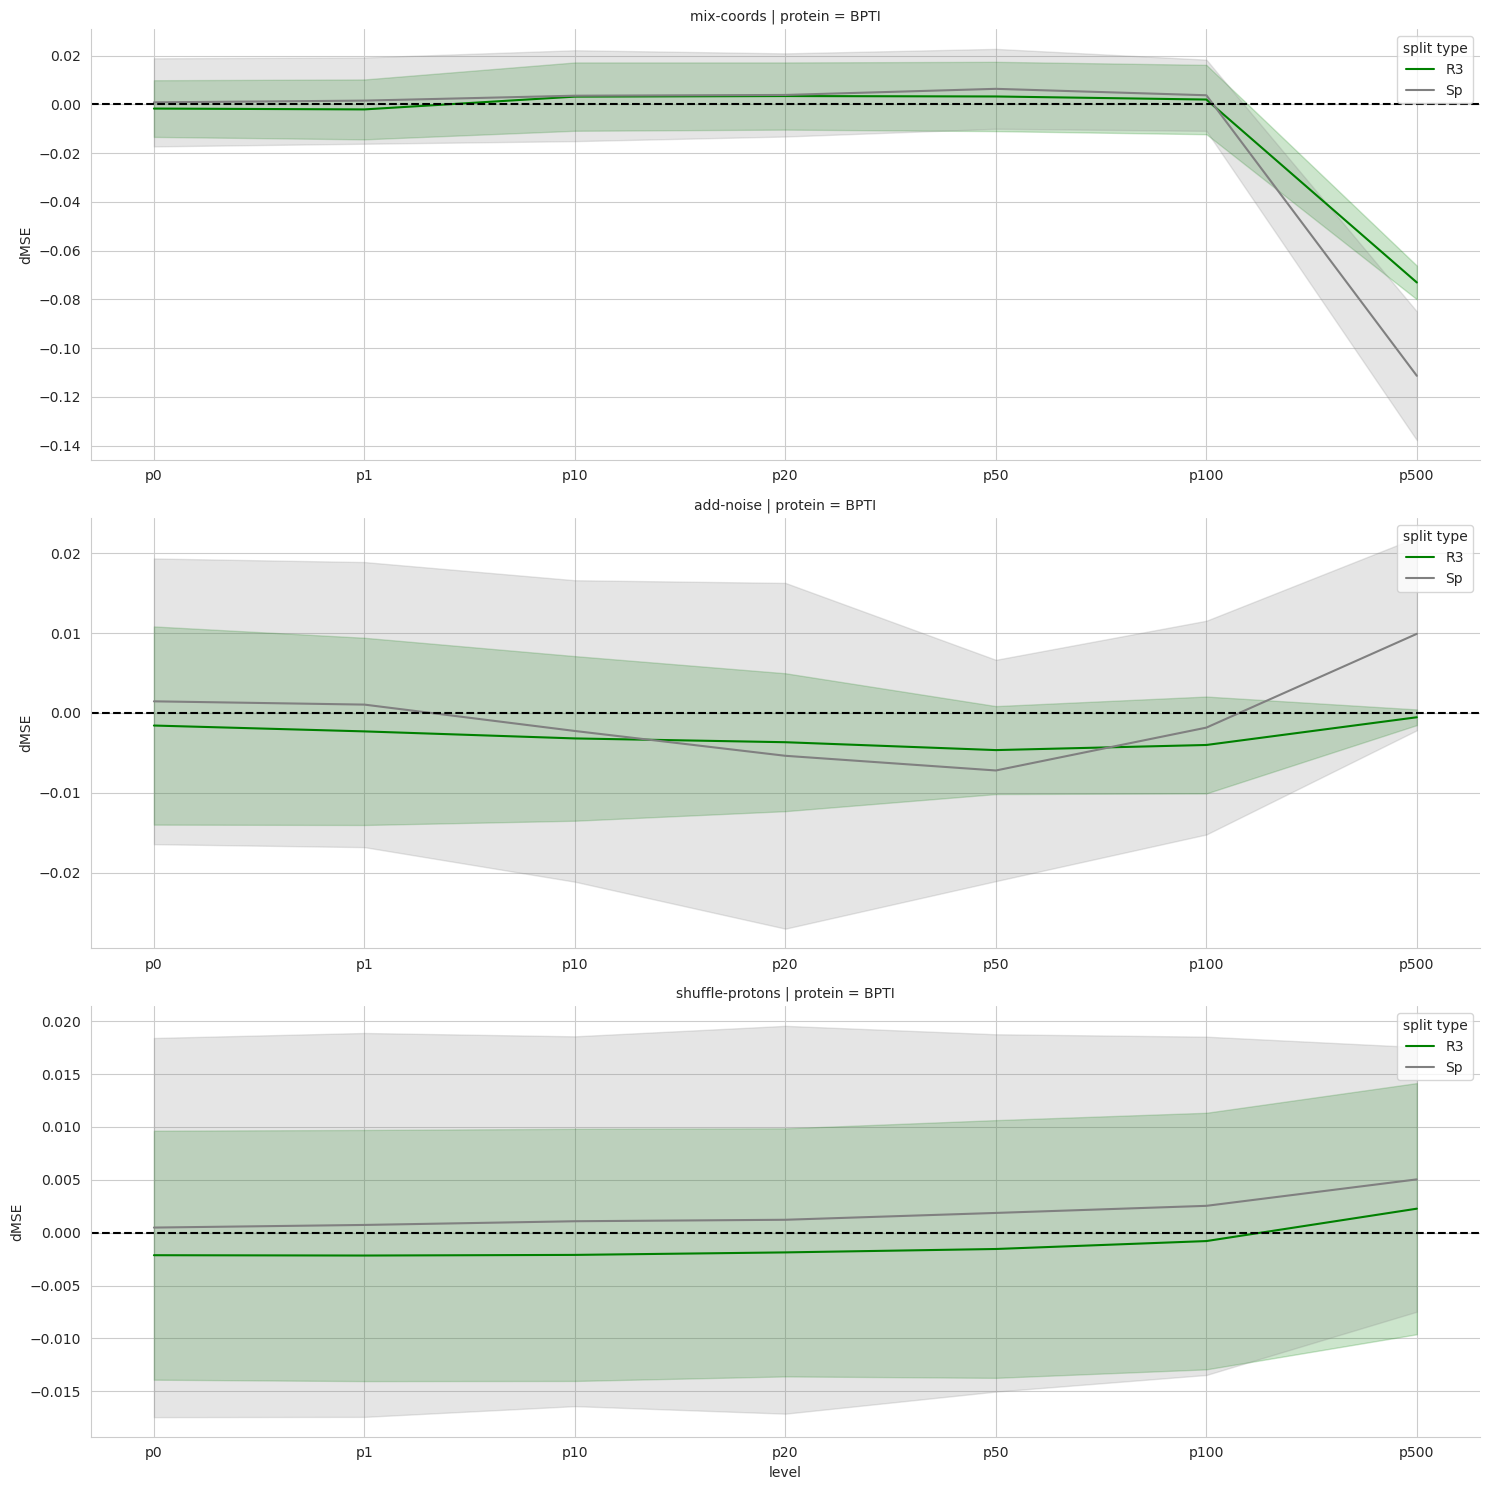

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Assuming dataset_order is defined as in your code
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["method"] != "BV"]
# dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["ensemble"].isin(dataset_order)]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)
def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        
        # subtract "p0" from

        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = means.index.values
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])
g.map_dataframe(plot_mean_std, "level", "dMSE")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("dMSE")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

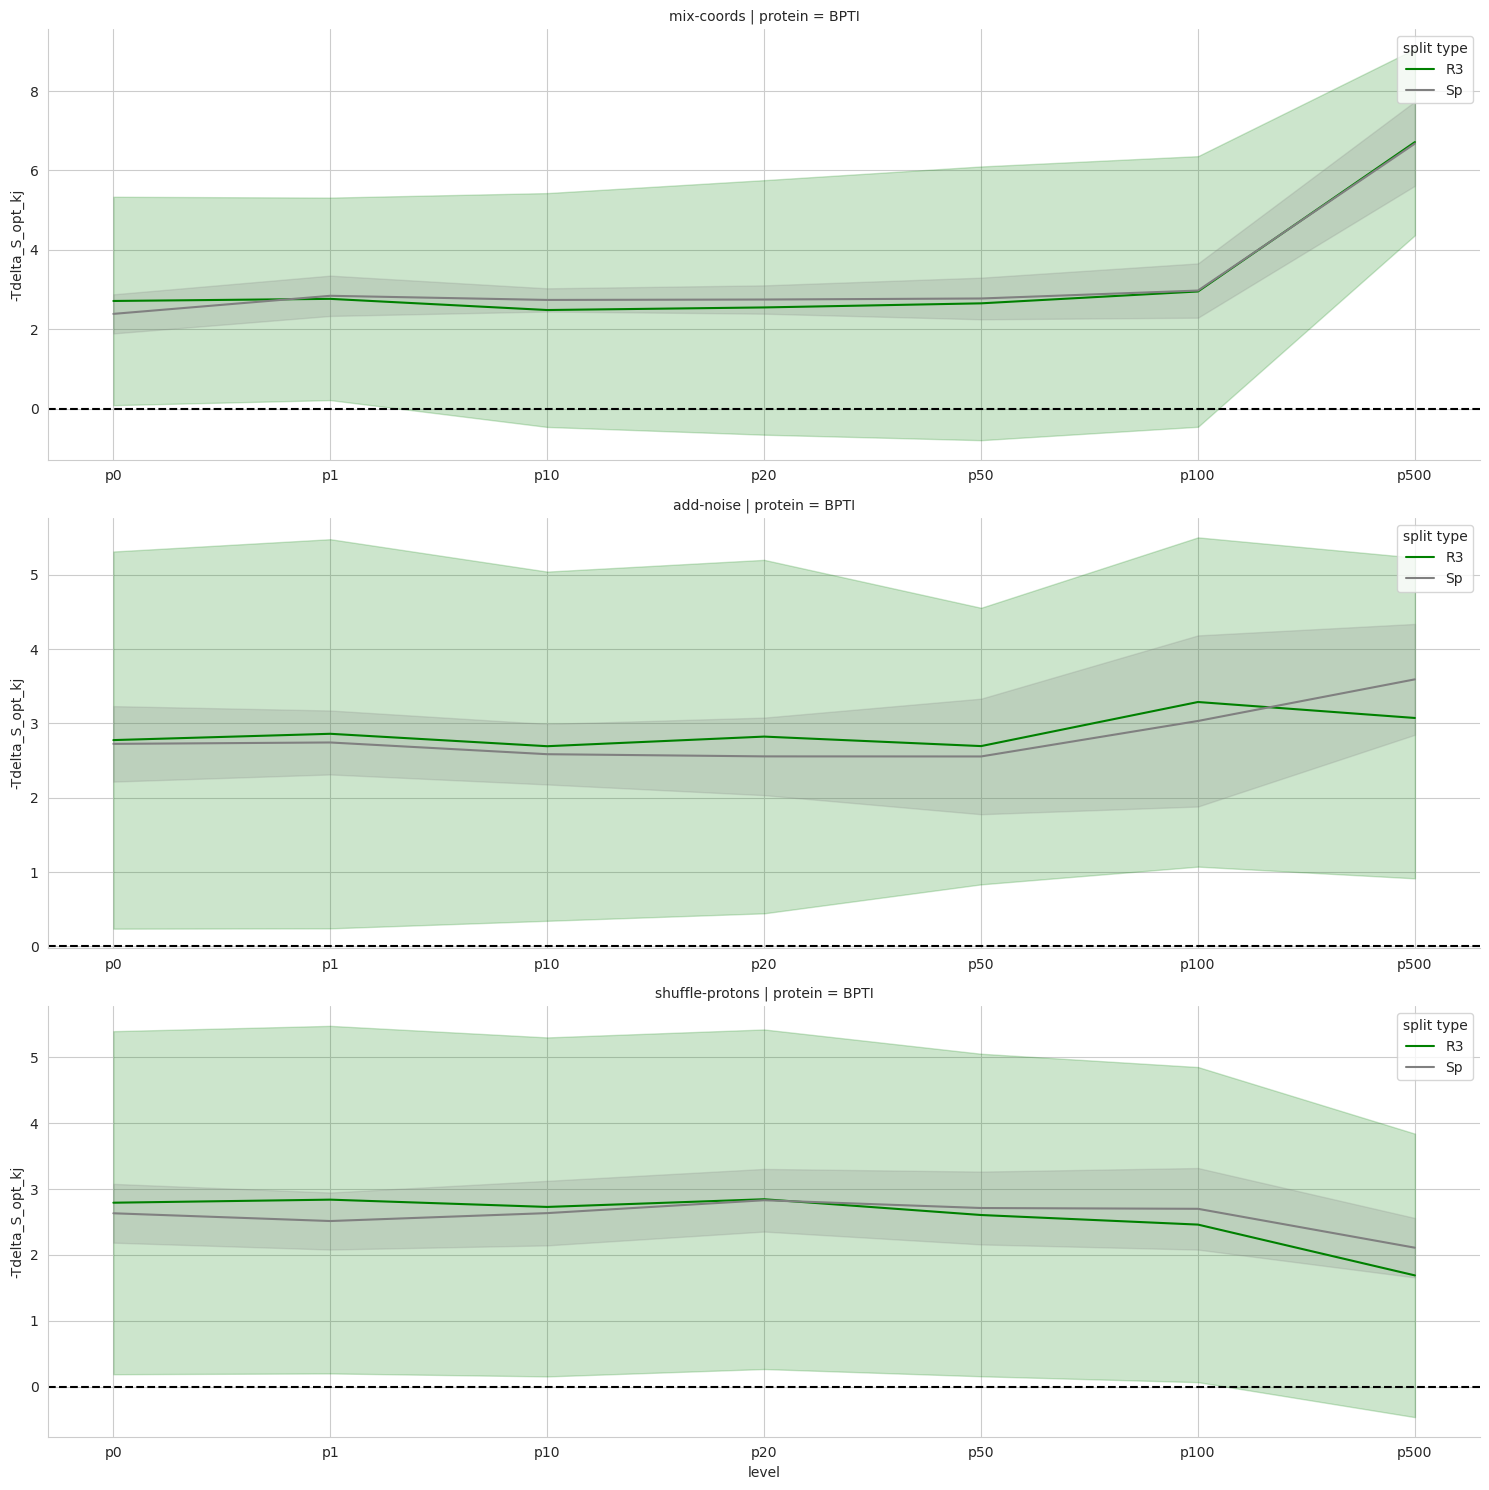

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Dataset and level orders
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Convert level column to categorical with specified order
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = np.arange(len(means))  # Use numerical indices for plotting
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)
        
        # Set x-ticks and labels
        ax.set_xticks(x_vals)
        ax.set_xticklabels(level_order)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])

g.map_dataframe(plot_mean_std, "level", "-Tdelta_S_opt_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("-Tdelta_S_opt_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()


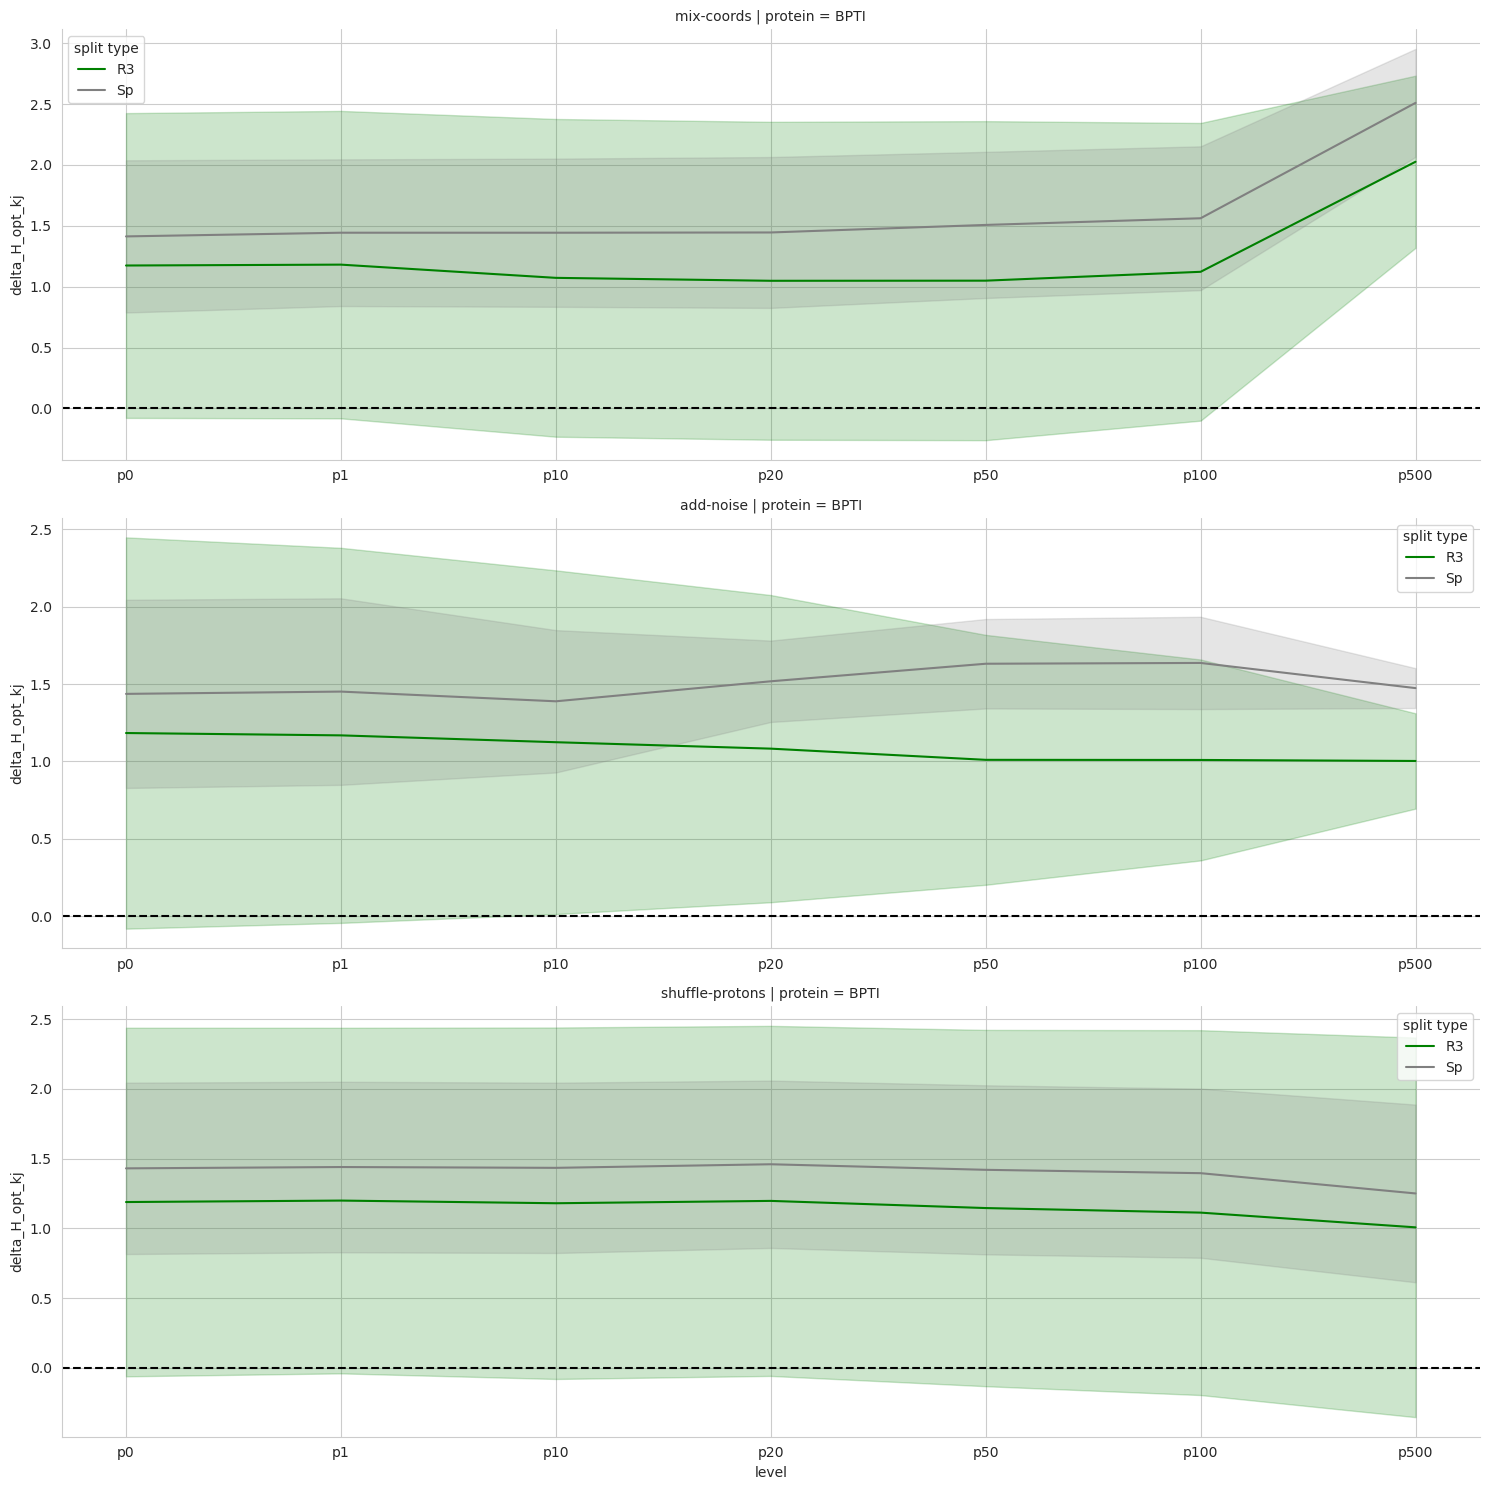

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Dataset and level orders
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Convert level column to categorical with specified order
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = np.arange(len(means))  # Use numerical indices for plotting
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)
        
        # Set x-ticks and labels
        ax.set_xticks(x_vals)
        ax.set_xticklabels(level_order)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])

g.map_dataframe(plot_mean_std, "level", "delta_H_opt_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("delta_H_opt_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

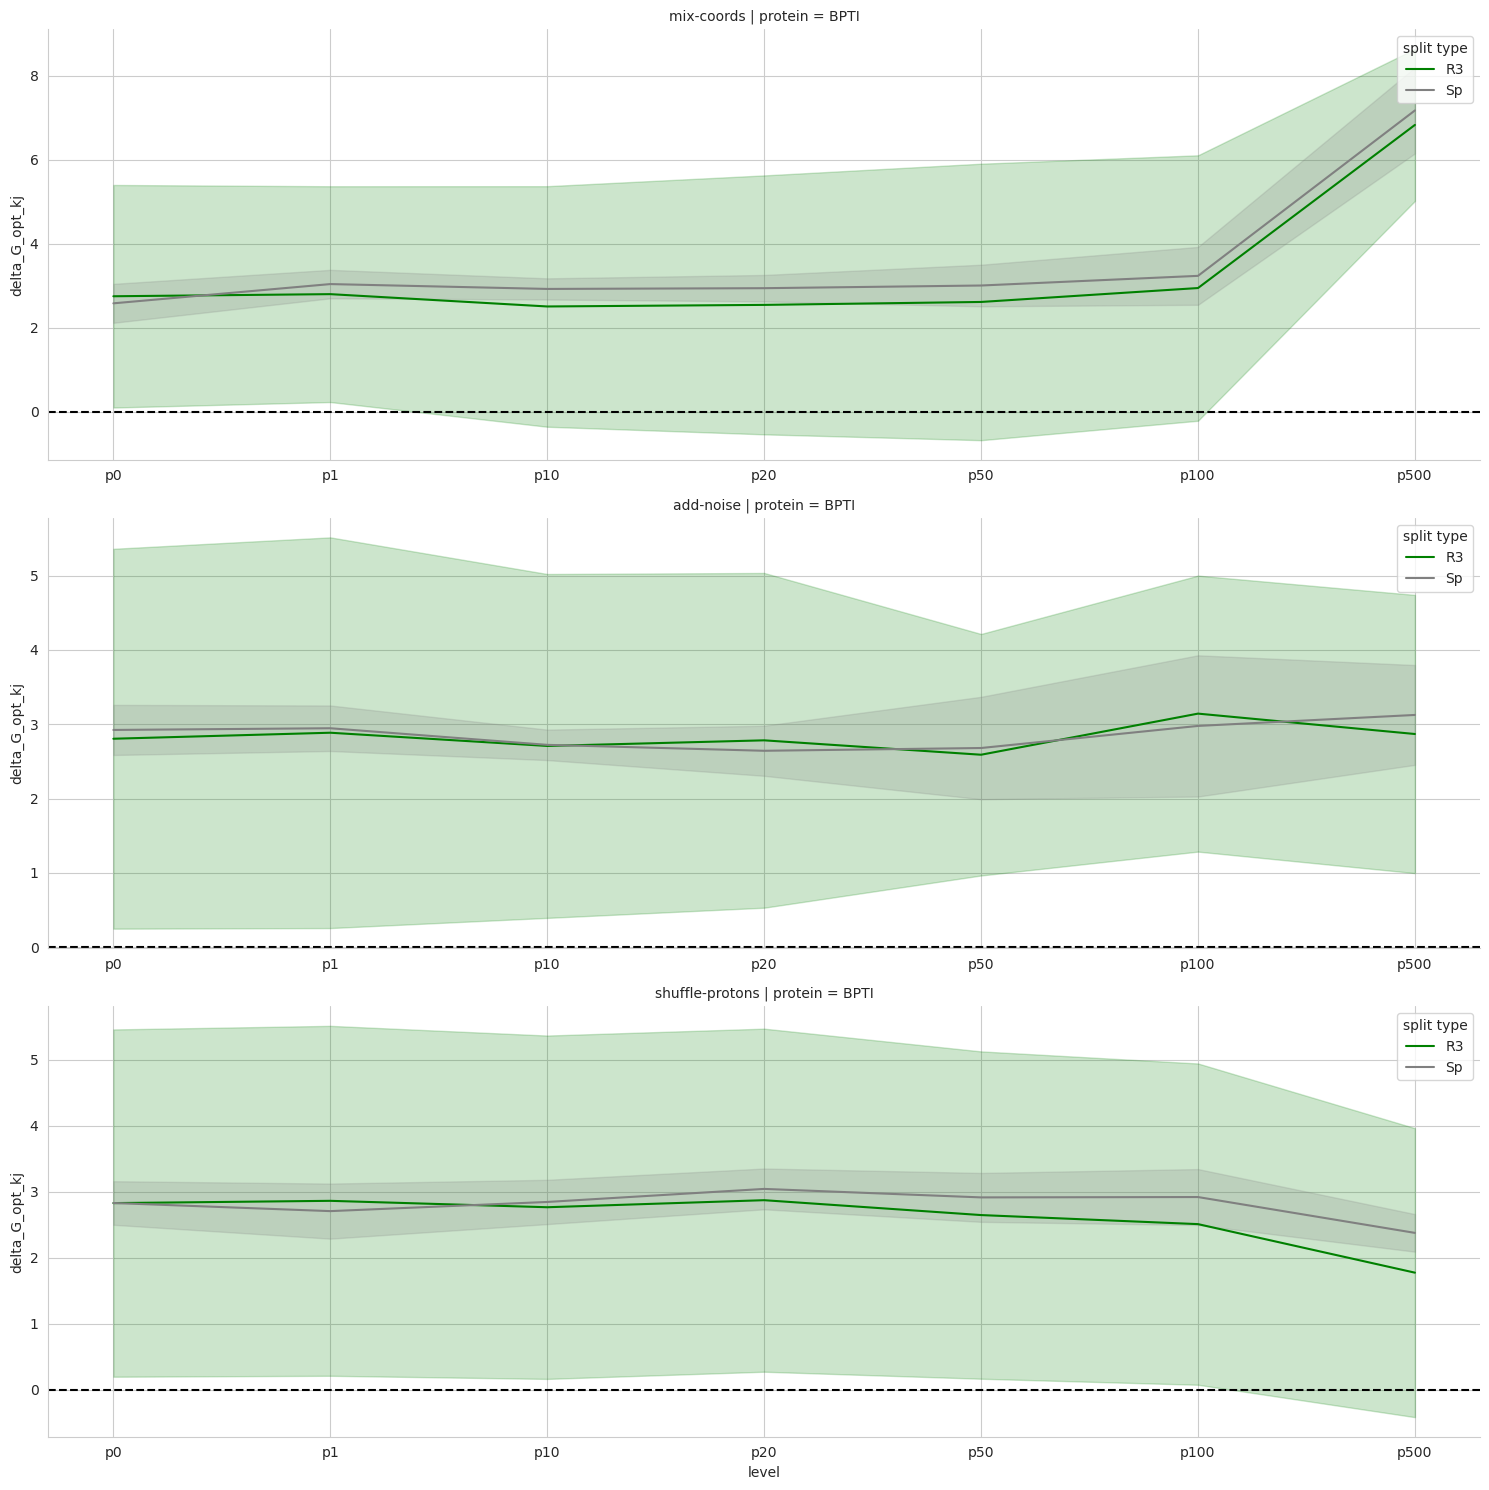

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Dataset and level orders
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Convert level column to categorical with specified order
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = np.arange(len(means))  # Use numerical indices for plotting
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)
        
        # Set x-ticks and labels
        ax.set_xticks(x_vals)
        ax.set_xticklabels(level_order)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])

g.map_dataframe(plot_mean_std, "level", "delta_G_opt_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("delta_G_opt_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

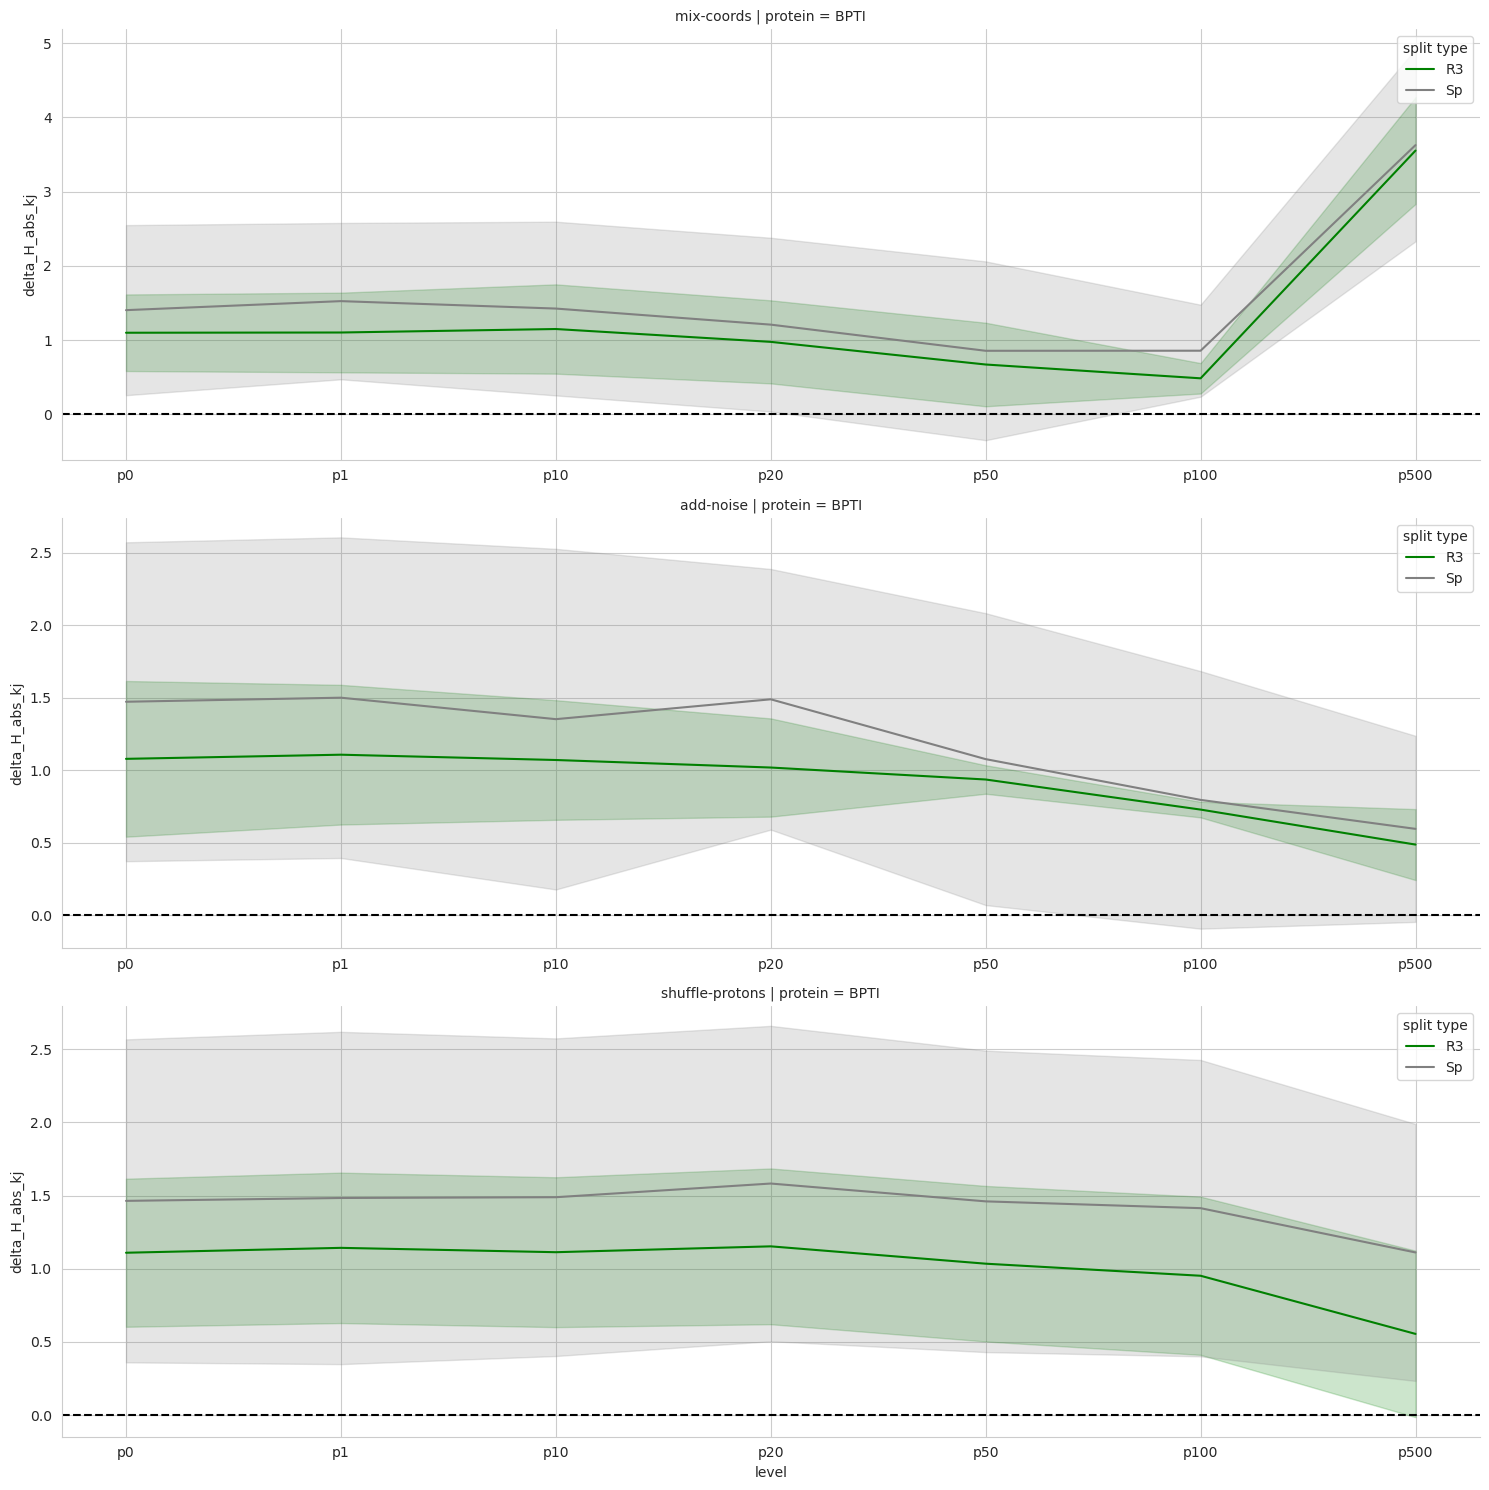

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("whitegrid")

# Dataset and level orders
dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
level_order = ["p0", "p1", "p10", "p20", "p50", "p100", "p500"]

# Filter the dataframe
dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Convert level column to categorical with specified order
dMSE_energy_df['level'] = pd.Categorical(dMSE_energy_df['level'], 
                                        categories=level_order, 
                                        ordered=True)

def plot_mean_std(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    for split_type, color in [("R3", "green"), ("Sp", "grey")]:
        subset = data[data["split_type"] == split_type]
        # Calculate mean and std for each x value
        means = subset.groupby(x)[y].mean()
        stds = subset.groupby(x)[y].std()
        x_vals = np.arange(len(means))  # Use numerical indices for plotting
        
        # Plot mean line
        ax.plot(x_vals, means.values, color=color, label=split_type)
        # Plot std band
        ax.fill_between(x_vals,
                       means.values - stds.values,
                       means.values + stds.values,
                       alpha=0.2, color=color)
        
        # Set x-ticks and labels
        ax.set_xticks(x_vals)
        ax.set_xticklabels(level_order)

# Create FacetGrid and map the custom plotting function
g = sns.FacetGrid(dMSE_energy_df, row="poison_type", height=5, aspect=3, col="protein",
                  sharey='row', sharex='row', col_order=["BPTI"])

g.map_dataframe(plot_mean_std, "level", "delta_H_abs_kj")

# Customize the plot
g.set_titles(row_template="{row_name}")
g.set_ylabels("delta_H_abs_kj")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')
    ax.legend(title="split type")

plt.show()

In [28]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["method"] != "BV"]
# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=2, sharey='row', sharex='row', row_order=["BPTI"])#, col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="c_frac1", y="delta_H_abs_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("delta_H_abs_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

KeyError: 'method'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(RW_val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="method", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 750x0 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))
# R3_val_df = R3_val_df[R3_val_df["ensemble"] == "dirty"]
# Create the FacetGrid
g = sns.FacetGrid(R3_val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="split_type", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(val_df, col="protein", col_wrap=1, height=5, aspect=1.5, sharey=False)#, col_order=protein_names)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="c_frac1", y="mse", hue="split_type", palette=palette, order=method_order)
# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

BV_constants_df = pkl_list["BV_constants"]
# remove constants which are default
default_Bc = 0.35
default_Bh = 2.0
BV_constants_df = BV_constants_df[(BV_constants_df["Bc"] != default_Bc) & (BV_constants_df["Bh"] != default_Bh)]

# Set up a FacetGrid to create a grid of scatter plots
g = sns.FacetGrid(BV_constants_df, col="protein", col_wrap=1, height=4, aspect=1.5)#, col_order=protein_names)
g.map_dataframe(sns.scatterplot, x='Bc', y='Bh', hue='c_frac1', alpha=0.7)

# Draw the _BV constants lines on each subplot
_Bc = 0.35
_Bh = 2.0

# Define a helper function to draw lines across facets
def add_lines(**kwargs):
    plt.axvline(x=_Bc, color='grey', linestyle='--')
    plt.axhline(y=_Bh, color='grey', linestyle='--')

g.map(add_lines)

# Adjust the axes limits uniformly
g.set(xlim=(0, 0.7))

# Additional customizations
g.add_legend(title='Fit')  # Add a legend to the plot with a title
g.set_axis_labels("Bc", "Bh")  # Set axis labels
g.set_titles("Protein: {col_name}")  # Set titles for subplots

# Optional: Adjust the layout and title
plt.subplots_adjust(top=0.95)  # Adjust subplots to provide space for the title
g.fig.suptitle('BV Constants by Protein')  # Set a super title for the grid

plt.yscale('log')

# Show the plot
plt.show()